In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Read suicides dataframe
sd = pd.read_csv('master.csv')

In [3]:
# What's in the table?
sd.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# Erase year 2016 (It has wrong information)
sd = sd[sd.year != 2016]

In [5]:
# See if the names of columns has an extra spacer of something
list(sd.columns.values) 

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

As you can see ' gdp_for_year ($) ' has two extra spaces. These extra characters produces problemas.

In [6]:
# Rename columns for better code
sd.rename(columns={"suicides_no": "suicides", "suicides/100k pop": "s/100k", 
                   " gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)": "gdp" }, inplace=True)

In [7]:
list(sd.columns.values) 

['country',
 'year',
 'sex',
 'age',
 'suicides',
 'population',
 's/100k',
 'country-year',
 'HDI for year',
 'gdp_for_year',
 'gdp',
 'generation']

In [8]:
# Deleting columns that I not going to use
sd.drop(['country-year', 'HDI for year', 'gdp_for_year'], axis=1, inplace=True)

In [9]:
sd

,country,year,sex,age,suicides,population,s/100k,gdp,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,2309,Generation Z


In [10]:
# How many unique countries
len(sd.country.unique())

100

In [11]:
sd.describe()

,year,suicides,population,s/100k,gdp
count,27660.000000,27660.000000,2.766000e+04,27660.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,126352.000000


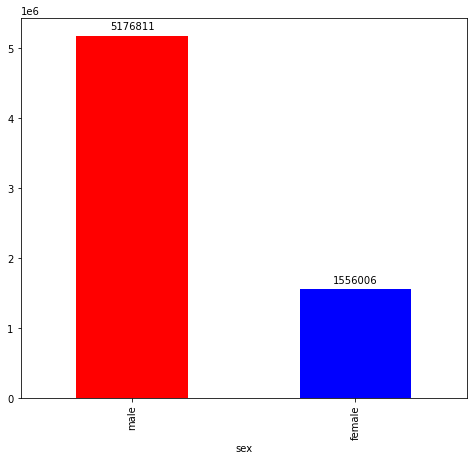

In [12]:
# How many women and men?
t1 = pd.pivot_table(sd, values='suicides', index=['country'], columns=['sex'], aggfunc=np.sum)
plt.figure(figsize=(8, 7))
splot = t1[['male','female']].sum().plot.bar(color=['red', 'blue'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


Text(0, 0.5, 'Sex')

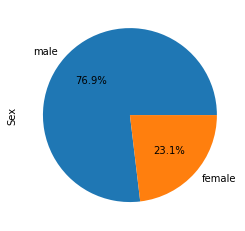

In [13]:
splot = t1[['male','female']].sum().plot.pie(autopct='%1.1f%%')
plt.ylabel("Sex")

In [14]:
# Study generations
sd.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

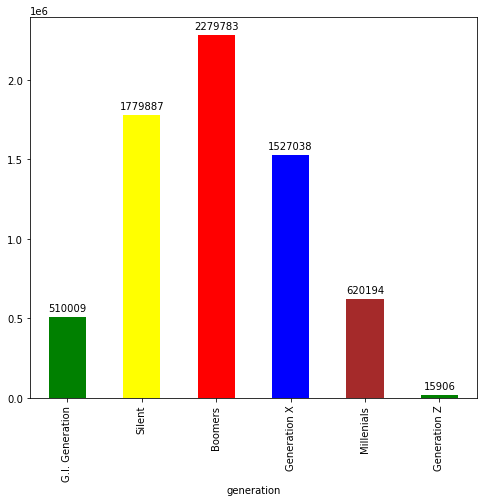

In [15]:
# How many by generation?
t2 = pd.pivot_table(sd, values='suicides', index=['country'], columns=['generation'], aggfunc=np.sum)
plt.figure(figsize=(8, 7))
splot = t2[['G.I. Generation', 'Silent','Boomers', 'Generation X', 'Millenials', 'Generation Z']].sum().plot.bar(color=['green','yellow', 'red', 'blue', 'brown'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [16]:
# Study age range
sd.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

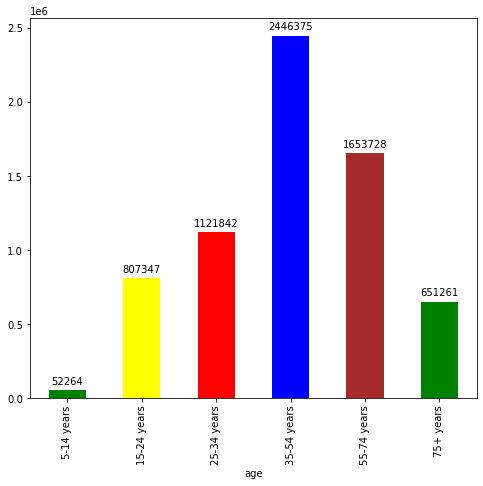

In [17]:
# How many by age?
t3 = pd.pivot_table(sd, values='suicides', index=['country'], columns=['age'], aggfunc=np.sum)
plt.figure(figsize=(8, 7))
splot = t3[['5-14 years', '15-24 years','25-34 years', '35-54 years', '55-74 years', '75+ years']].sum().plot.bar(color=['green','yellow', 'red', 'blue', 'brown'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Text(0, 0.5, 'Age')

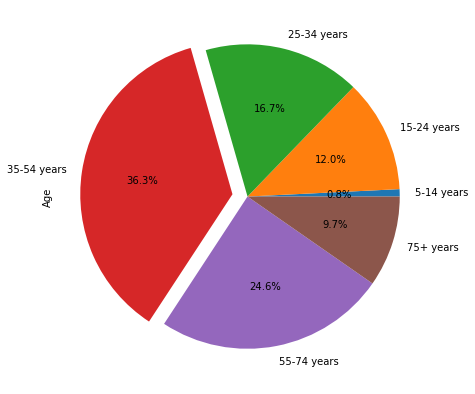

In [18]:
# How many by age?
t3 = pd.pivot_table(sd, values='suicides', index=['country'], columns=['age'], aggfunc=np.sum)
plt.figure(figsize=(8, 7))
splot = t3[['5-14 years', '15-24 years','25-34 years', '35-54 years', '55-74 years', '75+ years']]\
.sum().plot.pie(autopct='%1.1f%%', explode=(0, 0, 0, 0.1, 0, 0) )
plt.ylabel("Age")

In [19]:
# Which country has more suicides in total?
sd[sd['suicides']==sd['suicides'].max()]['country']

20996    Russian Federation
Name: country, dtype: object

In [20]:
# Top 20 countries with more suicides
t1 = pd.pivot_table(sd, values='s/100k', index=['country'], columns=['sex'], aggfunc=np.sum)
t1['Total'] = t1['female'] + t1['male']
t1.sort_values(by = 'Total',ascending = False).head(20)

sex,female,male,Total
country,,,
Russian Federation,1879.37,9425.76,11305.13
Lithuania,1641.94,8585.22,10227.16
Hungary,2135.04,7779.69,9914.73
Kazakhstan,1717.33,7802.19,9519.52
Republic of Korea,2755.13,6595.32,9350.45
Ukraine,1497.09,7434.57,8931.66
Austria,1934.05,6958.95,8893.00
Japan,2546.84,5478.39,8025.23
Finland,1582.58,6341.53,7924.11


In [21]:
# Create new table with nº of suicides per age and year
t2 = pd.pivot_table(sd, values='suicides', index=['year'], columns=['age'], aggfunc=np.sum)

In [22]:
t2

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
1985,17870,20771,35748,984,28736,11954
1986,18063,21685,37558,944,29760,12660
1987,16432,22309,40649,935,32469,14048
1988,15337,21332,38770,837,30538,14212
1989,18636,29427,53541,1150,40087,17403
1990,23248,35276,65242,1477,47018,21100
1991,23317,35615,68374,1533,48315,20866
1992,24727,37758,75051,1687,51506,20744
1993,25262,39044,80670,1789,54278,20522


In [23]:
# Studying young people
t2.drop(columns=['35-54 years', '55-74 years', '75+ years'], inplace =True)

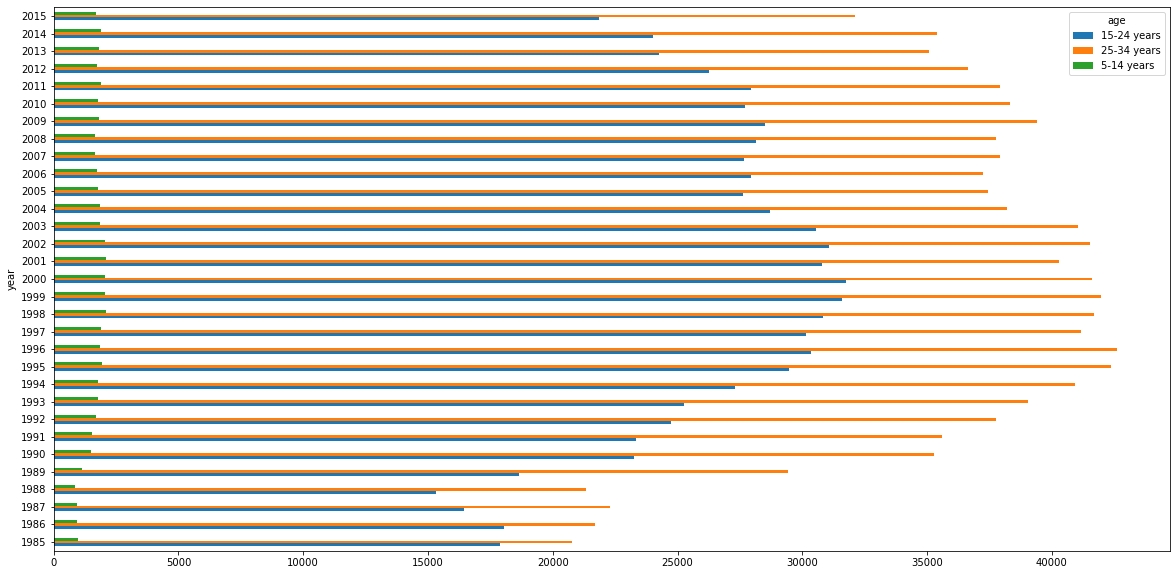

In [24]:
# General plot for obtaining the top years
t2.plot(kind='barh', figsize=(20,10))

In [25]:
# Range with the bigger suicedes rate
sub_t2 = t2.iloc[10:19]

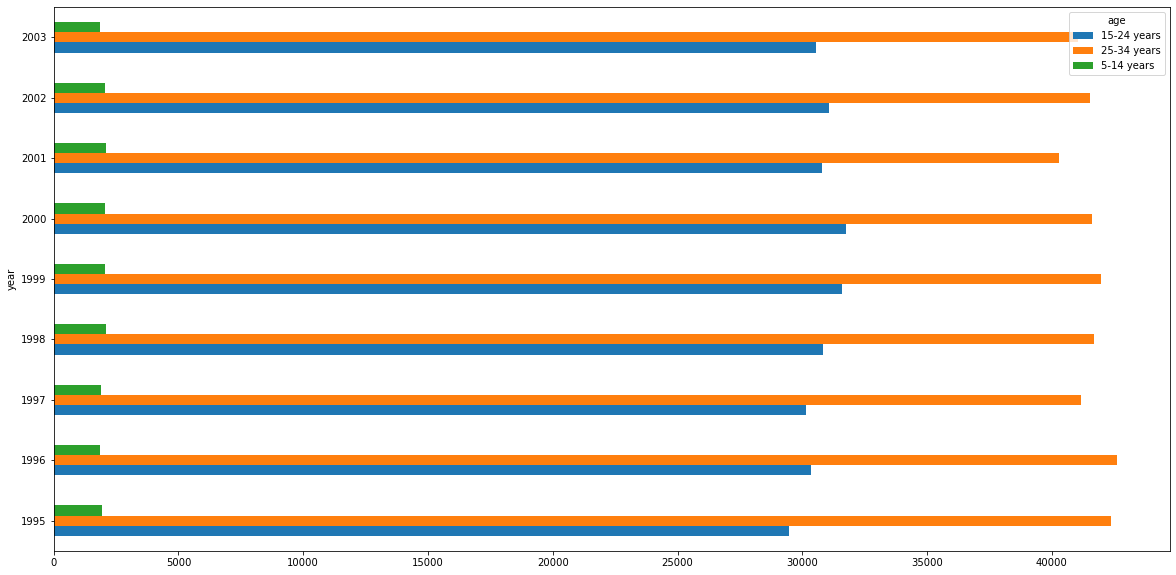

In [26]:
sub_t2.plot(kind='barh', figsize=(20,10))

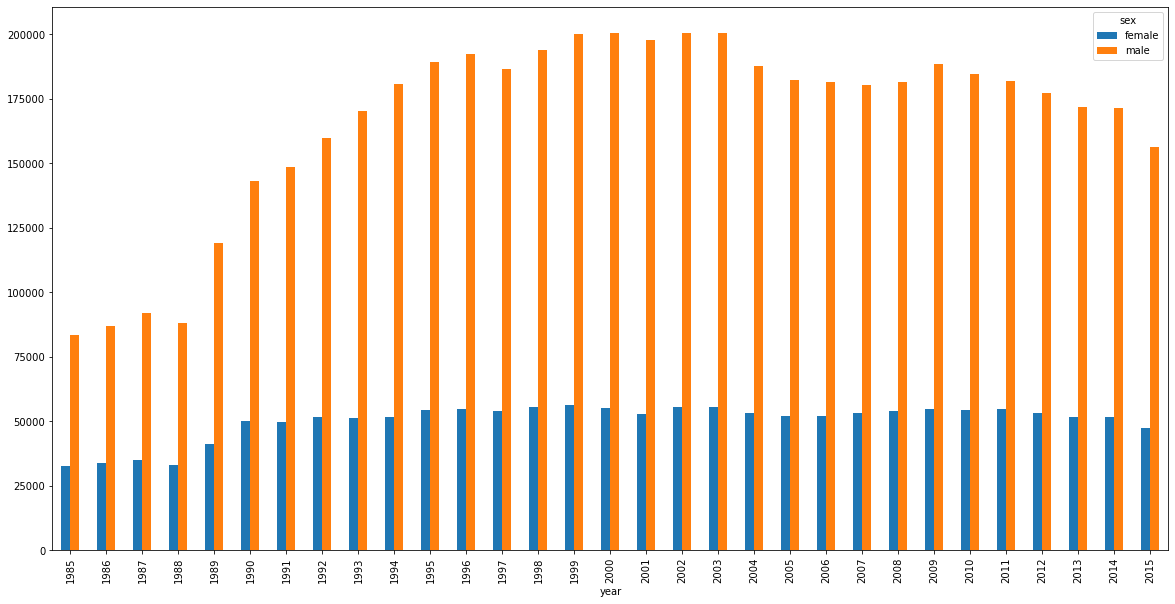

In [27]:
# Create new table with nº of suicides per sex and year
pd.pivot_table(sd, values='suicides', index=['year'], columns=['sex'], aggfunc=np.sum).plot.bar(figsize=(20,10))


In [28]:
ct=pd.pivot_table(sd, values='suicides', index=['year'], columns=['sex'], aggfunc=np.sum)
# Comparing the worst year of lower (1987) and the worst higger (2000)
# Percentage
100*(ct.iloc[2][1]/ct.iloc[15][1])

45.7856793865728

In [29]:
# Study generations
sd.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [30]:
# Top 20 countries with more suicides in the millenials
# Suicides per 100k population
t3 = pd.pivot_table(sd, values='s/100k', index=['country'], columns=['generation'], aggfunc=np.sum)
t3.sort_values(by = 'Millenials',ascending = False).head(20)

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
country,,,,,,
Kazakhstan,2087.76,1196.52,2235.30,50.08,1121.82,2828.04
Lithuania,2505.95,766.48,2290.18,24.01,1101.47,3539.07
Guyana,1489.72,439.54,1778.72,44.04,1098.58,1805.32
Russian Federation,2599.38,1712.38,2338.06,24.68,1067.14,3563.49
Suriname,1254.02,1077.86,1550.39,65.82,1025.37,2188.86
Finland,2041.56,1326.13,1709.75,6.63,724.03,2116.01
Estonia,1510.59,831.93,1281.32,13.35,649.07,2587.52
Latvia,1623.59,811.89,1496.71,8.05,642.62,2790.49
Japan,1568.69,2043.49,1227.80,11.63,634.21,2539.41


In [31]:
# Top 20 countries with more suicides in the Generation X
# Suicides per 100k population
t4 = pd.pivot_table(sd, values='s/100k', index=['country'], columns=['generation'], aggfunc=np.sum)
t4.sort_values(by = 'Generation X',ascending = False).head(20)

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
country,,,,,,
Russian Federation,2599.38,1712.38,2338.06,24.68,1067.14,3563.49
Lithuania,2505.95,766.48,2290.18,24.01,1101.47,3539.07
Kazakhstan,2087.76,1196.52,2235.30,50.08,1121.82,2828.04
Guyana,1489.72,439.54,1778.72,44.04,1098.58,1805.32
Finland,2041.56,1326.13,1709.75,6.63,724.03,2116.01
Belarus,1993.97,1050.73,1601.80,13.20,541.07,2630.36
Suriname,1254.02,1077.86,1550.39,65.82,1025.37,2188.86
New Zealand,1012.01,822.54,1500.49,14.72,600.25,1058.31
Latvia,1623.59,811.89,1496.71,8.05,642.62,2790.49


In [32]:
# Top 20 countries with more suicides in the Generation Z
# Suicides per 100k population
t5 = pd.pivot_table(sd, values='s/100k', index=['country'], columns=['generation'], aggfunc=np.sum)
t5.sort_values(by = 'Generation Z',ascending = False).head(20)

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
country,,,,,,
Suriname,1254.02,1077.86,1550.39,65.82,1025.37,2188.86
Kazakhstan,2087.76,1196.52,2235.30,50.08,1121.82,2828.04
Guyana,1489.72,439.54,1778.72,44.04,1098.58,1805.32
Kyrgyzstan,1013.70,750.41,888.42,35.11,469.09,1300.57
Ecuador,439.85,274.10,621.43,32.13,439.52,538.18
Russian Federation,2599.38,1712.38,2338.06,24.68,1067.14,3563.49
Lithuania,2505.95,766.48,2290.18,24.01,1101.47,3539.07
Saint Vincent and Grenadines,422.63,103.59,405.48,21.06,177.93,595.94
Ukraine,2018.61,1759.92,1488.86,19.74,615.90,3028.63


In [33]:
lit = sd[sd['country']=='Lithuania']
lit

,country,year,sex,age,suicides,population,s/100k,gdp,generation
15044,Lithuania,1995,male,35-54 years,632,436306,144.85,2324,Boomers
15045,Lithuania,1995,male,75+ years,67,47214,141.91,2324,G.I. Generation
15046,Lithuania,1995,male,55-74 years,325,274196,118.53,2324,Silent
15047,Lithuania,1995,male,25-34 years,226,284758,79.37,2324,Generation X
15048,Lithuania,1995,male,15-24 years,134,263792,50.80,2324,Generation X
...,...,...,...,...,...,...,...,...,...
15291,Lithuania,2015,female,35-54 years,46,419841,10.96,15073,Generation X
15292,Lithuania,2015,female,25-34 years,17,182926,9.29,15073,Millenials
15293,Lithuania,2015,female,15-24 years,10,178882,5.59,15073,Millenials
15294,Lithuania,2015,female,5-14 years,3,133506,2.25,15073,Generation Z


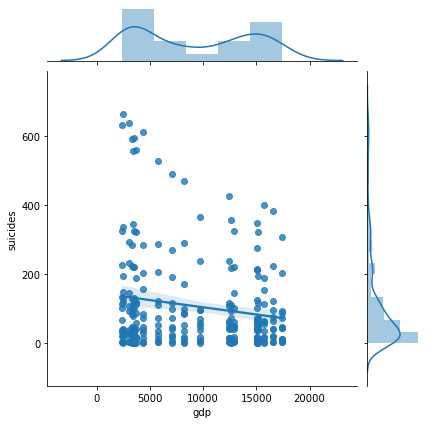

In [34]:
# Relation between GDP and Suicides
sns.jointplot(x='gdp', y='suicides', kind='reg', data=lit)

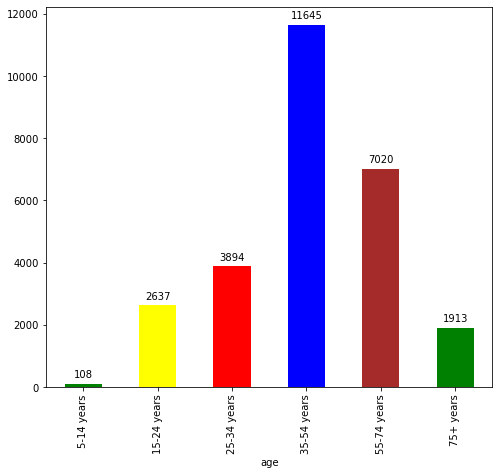

In [35]:
# How many by generation?
tl = pd.pivot_table(lit, values='suicides', index=['country'], columns=['age'], aggfunc=np.sum)
plt.figure(figsize=(8, 7))
tl_o = tl[['5-14 years', '15-24 years','25-34 years', '35-54 years', '55-74 years', '75+ years']].sum().plot.bar(color=['green','yellow', 'red', 'blue', 'brown'])
for p in tl_o.patches:
    tl_o.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

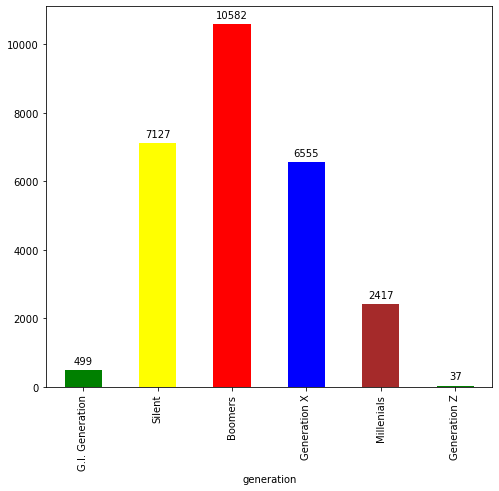

In [36]:
# How many by generation?
t2 = pd.pivot_table(lit, values='suicides', index=['country'], columns=['generation'], aggfunc=np.sum)
plt.figure(figsize=(8, 7))
splot = t2[['G.I. Generation', 'Silent','Boomers', 'Generation X', 'Millenials', 'Generation Z']].sum().plot.bar(color=['green','yellow', 'red', 'blue', 'brown'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [37]:
sd1 = sd.groupby(['country'], as_index = False).sum()
sd1

,country,year,suicides,population,s/100k,gdp
0,Albania,527796,1970,62325467,924.76,490788
1,Antigua and Barbuda,647832,11,1990228,179.14,3385212
2,Argentina,744000,82219,1035985431,3894.59,2944044
3,Armenia,576672,1838,74948140,935.65,520548
4,Aruba,336720,101,1259677,1596.52,4069236
...,...,...,...,...,...,...
95,United Arab Emirates,144540,622,36502275,94.89,3035664
96,United Kingdom,744000,136805,1738767780,2790.92,11869908
97,United States,744000,1034013,8054027201,5140.97,14608296
98,Uruguay,672072,13138,84068943,6538.96,2561016


In [38]:
# Map plot with the suicides number
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


layout = dict(title='Number of suicides', geo=dict(showframe=False, projection={'type': 'natural earth'}))

data = go.Choropleth(locations=sd1['country'], 
                     locationmode='country names', 
                     z=sd1['suicides'], 
                     colorscale='Viridis', 
                     colorbar={'title': 'Suicides'})

fig = go.Figure(data=[data], layout=layout)

iplot(fig)

ModuleNotFoundError: No module named 'chart_studio'

In [2]:
sd.columns

NameError: name 'sd' is not defined

In [ ]:
y = sd['suicides']

In [ ]:
X = sd[['gdp', 'population']]

In [ ]:
# Create a test data
from sklearn.model_selection import train_test_split

In [ ]:
# Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Linear regression object
lm = LinearRegression()

In [ ]:
# Fit the training data
lm.fit(X_train,y_train)

In [ ]:
# The coefficients
print('Coefficients: \n', lm.intercept_)

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)

In [ ]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf.head()

In [ ]:
# We give to the model data that never saw (in our case X_text)
# We train our model with X_train
predictions = lm.predict( X_test)

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
sns.distplot((y_test-predictions),bins=40);

In [ ]:
# Create new table with nº of suicides per age and year
spy = pd.pivot_table(sd, values='suicides', index=['country'], columns=['year'], aggfunc=np.sum)

In [ ]:
spy